In [78]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras import layers,regularizers

from skimage import transform


In [79]:
def resize_batch(imgs):
    # A function to resize a batch of MNIST images to (32, 32)
    # Args:
    #   imgs: a numpy array of size [batch_size, 28 X 28].
    # Returns:
    #   a numpy array of size [batch_size, 32, 32].
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs

# Kannada-MNIST Baseline

In [80]:
trainDF = pd.read_csv('train.csv')
trainDF.head(11)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
TRAIN = 0.8
TEST = 1 - TRAIN
NUM_DATA_POINTS = trainDF.shape[0]

In [82]:
splitInd = int(NUM_DATA_POINTS * TRAIN)

ytrain = trainDF.label.values[:splitInd]
xtrain = trainDF.drop('label', axis=1)[:splitInd].values.reshape(splitInd, 28, 28, 1) / 255
xtrainR = resize_batch(xtrain)

ytest = trainDF.label.values[splitInd:]
xtest = trainDF.drop('label', axis=1)[splitInd:].values.reshape(NUM_DATA_POINTS - splitInd, 28, 28, 1) / 255
xtestR = resize_batch(xtest)


In [83]:
print(f"ytrain has shape {ytrain.shape}")
print(f"xtrain has shape {xtrain.shape}")
print(f"xtrain-resized has shape {xtrainR.shape}\n")

print(f"ytest has shape {ytest.shape}")
print(f"xtest has shape {xtest.shape}")
print(f"xtest-resized has shape {xtrainR.shape}")


ytrain has shape (48000,)
xtrain has shape (48000, 28, 28, 1)
xtrain-resized has shape (48000, 32, 32, 1)

ytest has shape (12000,)
xtest has shape (12000, 28, 28, 1)
xtest-resized has shape (48000, 32, 32, 1)


4


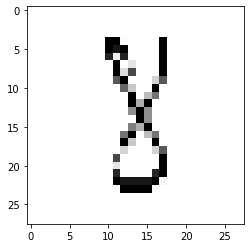

In [86]:
ind = 1234
print(ytrain[ind])
# plot original
plt.imshow(xtrain[ind].reshape(28,28), cmap='Greys')


4


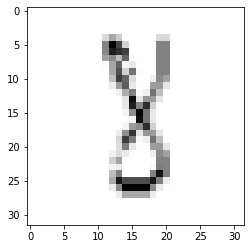

In [87]:
ind = 1234
print(ytrain[ind])

# plot resized
plt.imshow(xtrainR[ind].reshape(32,32), cmap='Greys')

### model and training

In [88]:
bmodel = Sequential()

bmodel.add(layers.Conv2D(32, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu, input_shape=(32, 32, 1)))
# bmodel.add(layers.LeakyReLU(alpha=0.2))
bmodel.add(layers.Dropout(0.5))

bmodel.add(layers.Conv2D(64, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu))
# bmodel.add(layers.LeakyReLU(alpha=0.2))
bmodel.add(layers.Dropout(0.5))

bmodel.add(layers.Conv2D(128, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu))
# bmodel.add(layers.LeakyReLU(alpha=0.2))
bmodel.add(layers.Dropout(0.5))

bmodel.add(layers.Conv2D(256, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu))
# bmodel.add(layers.LeakyReLU(alpha=0.2))
bmodel.add(layers.Dropout(0.5))

bmodel.add(layers.Conv2D(512, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu))
# bmodel.add(layers.LeakyReLU(alpha=0.2))
bmodel.add(layers.Dropout(0.5))

bmodel.add(layers.Flatten())

bmodel.add(layers.Dense(10, activation='softmax'))

In [89]:
bmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
bmodel.fit(x=xtrainR, y=ytrain, epochs=10) # chagne to 5 for future trainings

Epoch 1/10
48000/48000 [==============================] - 249s 5ms/step - loss: 0.2251 - accuracy: 0.9286
Epoch 2/10
48000/48000 [==============================] - 268s 6ms/step - loss: 0.1251 - accuracy: 0.9614
Epoch 3/10
48000/48000 [==============================] - 268s 6ms/step - loss: 0.1197 - accuracy: 0.9647
Epoch 4/10
48000/48000 [==============================] - 292s 6ms/step - loss: 0.1095 - accuracy: 0.9677
Epoch 5/10
48000/48000 [==============================] - 252s 5ms/step - loss: 0.1107 - accuracy: 0.9676
Epoch 6/10
48000/48000 [==============================] - 243s 5ms/step - loss: 0.1148 - accuracy: 0.9666
Epoch 7/10
48000/48000 [==============================] - 259s 5ms/step - loss: 0.1075 - accuracy: 0.9690
Epoch 8/10
48000/48000 [==============================] - 244s 5ms/step - loss: 0.1160 - accuracy: 0.9676
Epoch 9/10
48000/48000 [==============================] - 242s 5ms/step - loss: 0.1192 - accuracy: 0.9679
Epoch 10/10
48000/48000 [=====================

### K-MNIST baseline model has high test accuracy

In [90]:
bmodel.evaluate(xtestR, ytest)

12000/12000 [==============================] - 17s 1ms/step


[0.04158275653959329, 0.9878333210945129]

# Dig-MNIST basline

In [ ]:
trainDig = pd.read_csv('Dig-MNIST.csv')

In [ ]:
trainDig.shape

In [91]:
ytestDig = trainDig.label.values
xtestDig = trainDig.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255
xtestDigR = resize_batch(xtestDig)

3


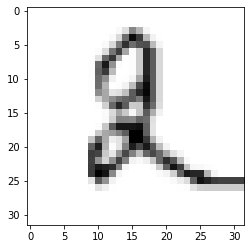

In [92]:
ind2 = 123
print(ytestDig[ind2])
# plt.imshow(xtrainDig[ind2].reshape(28,28), cmap='Greys')
plt.imshow(xtrainDigR[ind2].reshape(32,32), cmap='Greys')

### K-MNIST baseline model does not work well on Dig-MNIST

In [93]:
bmodel.evaluate(xtestDigR, ytestDig)

10240/10240 [==============================] - 16s 2ms/step


[1.4037973352707922, 0.749218761920929]

## Dig-MNIST model and training

In [95]:
splitI = int(TRAIN * trainDig.shape[0])

ytrainDig = trainDig.label.values[:splitI]
xtrainDigR = xtestDigR[:splitI]
# xtrainDig = trainDig.drop('label', axis=1)[:splitI].values.reshape(-1, 28, 28, 1) / 255
# xtrainDigR = resize_batch(xtrainDig)

ytestDig2 = trainDig.label.values[splitI:]
xtestDig2 = xtestDigR[splitI:]
# xtestDig2 = trainDig.drop('label', axis=1)[splitI:].values.reshape(-1, 28, 28, 1) / 255
# xtestDig2R = resize_batch(xtestDig2)

In [96]:
xtestDig2.shape

(2048, 32, 32, 1)

In [97]:
digmodel = Sequential()

digmodel.add(layers.Conv2D(32, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu, input_shape=(32, 32, 1)))
# digmodel.add(layers.LeakyReLU(alpha=0.2))
digmodel.add(layers.Dropout(0.5))

digmodel.add(layers.Conv2D(64, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu))
# digmodel.add(layers.LeakyReLU(alpha=0.2))
digmodel.add(layers.Dropout(0.5))

digmodel.add(layers.Conv2D(128, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu))
# digmodel.add(layers.LeakyReLU(alpha=0.2))
digmodel.add(layers.Dropout(0.5))

digmodel.add(layers.Conv2D(256, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu))
# digmodel.add(layers.LeakyReLU(alpha=0.2))
digmodel.add(layers.Dropout(0.5))

digmodel.add(layers.Conv2D(512, (4,4), strides=2, padding='same', activation=tf.nn.leaky_relu))
# digmodel.add(layers.LeakyReLU(alpha=0.2))

digmodel.add(layers.Flatten())

digmodel.add(layers.Dense(10, activation='softmax'))

In [98]:
digmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
digmodel.fit(x=xtrainDigR, y=ytrainDig, epochs=10)

Epoch 1/10
8192/8192 [==============================] - 52s 6ms/step - loss: 0.8746 - accuracy: 0.7096
Epoch 2/10
8192/8192 [==============================] - 48s 6ms/step - loss: 0.4715 - accuracy: 0.8492
Epoch 3/10
8192/8192 [==============================] - 45s 6ms/step - loss: 0.3786 - accuracy: 0.8789
Epoch 4/10
8192/8192 [==============================] - 48s 6ms/step - loss: 0.3336 - accuracy: 0.8945
Epoch 5/10
8192/8192 [==============================] - 40s 5ms/step - loss: 0.3040 - accuracy: 0.9041
Epoch 6/10
8192/8192 [==============================] - 40s 5ms/step - loss: 0.2843 - accuracy: 0.9081
Epoch 7/10
8192/8192 [==============================] - 40s 5ms/step - loss: 0.2729 - accuracy: 0.9122
Epoch 8/10
8192/8192 [==============================] - 41s 5ms/step - loss: 0.2457 - accuracy: 0.9180
Epoch 9/10
8192/8192 [==============================] - 40s 5ms/step - loss: 0.2374 - accuracy: 0.9233
Epoch 10/10
8192/8192 [==============================] - 41s 5ms/step - l

### Dig-MNIST model has pretty good test accuracy

In [99]:
digmodel.evaluate(xtestDig2R, ytestDig2)

2048/2048 [==============================] - 3s 2ms/step


[0.20095989829860628, 0.93994140625]

## Dig-MNIST model also not great for Kannada-MNIST

In [ ]:
digmodel.evaluate(xtestR, ytest)